<a href="https://colab.research.google.com/github/marinba2200/DL_test/blob/main/tumor_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #執行這個後點網址可以登入google，登入後會顯示authorization code，再輸入到下面框框
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os #連上雲端硬碟

os.chdir("/content/drive/My Drive/Colab Notebooks/dataset/Aidea/mutor/") #可自行在Colab Notebooks後方更改路徑
os.getcwd() #查看當前路徑

'/content/drive/My Drive/Colab Notebooks/dataset/Aidea/mutor'

In [ ]:
import matplotlib
from matplotlib import pylab as plt
import nibabel as nib
from nibabel.viewers import OrthoSlicer3D

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import cv2
from skimage import io
from PIL import Image

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow.keras.backend as K

import random
import glob
from sklearn.preprocessing import StandardScaler, normalize
from IPython.display import display
import math

In [ ]:
predict= cv2.resize(predict, (512, 512))

### 隱藏

<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 86)
affine: 
[[  -0.58593798    0.            0.          146.04800415]
 [   0.            0.58593798    0.         -116.65930176]
 [   0.            0.            2.          -62.31769943]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  86   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.585938  0.585938  2.        0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.

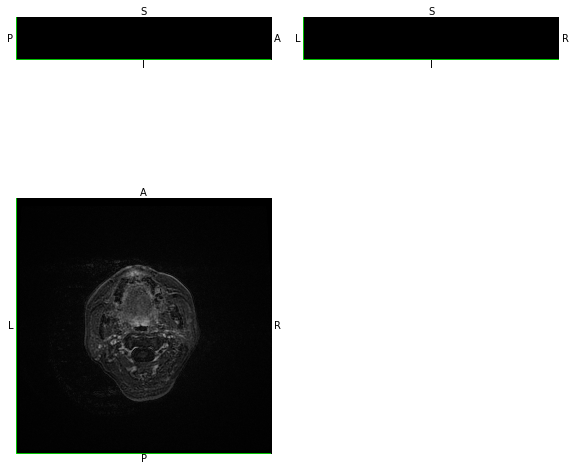

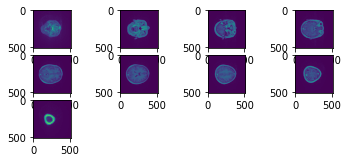

In [ ]:

file = 'training data/image/2ABGOEM3.nii.gz'    #nii或者nii.gz路徑
img = nib.load(file)     #讀取
 
print(img)  #檔案資訊
print(img.header['db_name'])    #输出nii的標頭檔 #dim中前三個數值可能是影像長寬與channel(?)，第四維時間軸所以可能是像影片的影像
 
width, height, queue = img.dataobj.shape  #讀取nii中影像的長寬與時間軸
 
OrthoSlicer3D(img.dataobj).show() #顯示nii中的影像部分
 
num = 1
for i in range(0, queue, 10):  #跌代從0~86-1(queue-1),間隔10,無條件捨去
    img_arr = img.dataobj[:,:,i]   #顯示第i時間(?)的影像
    plt.subplot(5,4,num)        #一次顯示多張影像，每行4張影像，num是顯示的位置(照順序左上開始)
    plt.imshow(img_arr)  # , cmap='gray' #設定顯示影像 #，顯示方式為灰階
    num += 1
 
plt.show() #顯示影像

<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 86)
affine: 
[[  -0.58593798    0.            0.          146.04800415]
 [   0.            0.58593798    0.         -116.65899658]
 [   0.            0.            2.          -62.31769943]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  86   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.        0.585938  0.585938  2.        0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0


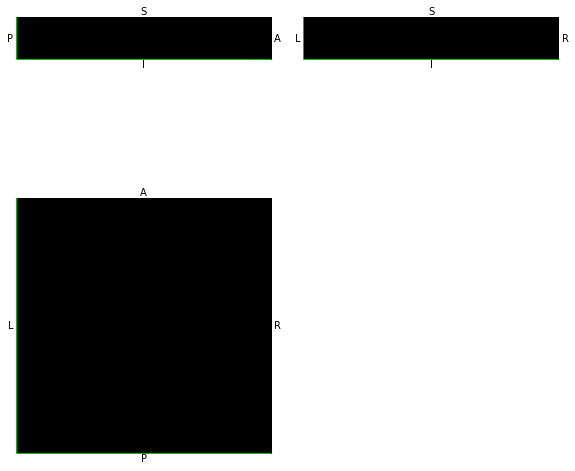

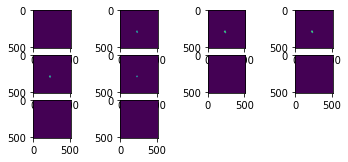

In [ ]:
file = 'training data/label/2ABGOEM3.nii.gz'    #nii或者nii.gz路徑
img = nib.load(file)     #讀取
 
print(img)  #檔案資訊 #输出nii的標頭檔 #dim中前三個數值可能是影像長寬與channel，第四維時間(?)所以可能是像影片
print(img.header['dim'])    
 
width, height, queue = img.dataobj.shape  #讀取nii中影像的長寬與時間(?)
 
OrthoSlicer3D(img.dataobj).show() #顯示nii中的影像部分
 
num = 1
for i in range(20, 30):  #跌代從20~29(queue),無條件捨去[其他時間都沒有東西(全黑)]
    img_arr = img.dataobj[:,:,i]   #顯示第i時間(?)的影像
    plt.subplot(5,4,num)        #一次顯示多張影像，每行4張影像，num是顯示的位置(照順序左上開始)
    plt.imshow(img_arr)  #設定顯示影像
    num += 1
 
plt.show() #顯示影像

### 顯示

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import glob

import nibabel as nib
import cv2
import imageio
from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image

In [ ]:
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html > /dev/null
!pip install --upgrade kornia > /dev/null
!pip install allennlp==1.1.0.rc4 > /dev/null
!pip install --upgrade fastai > /dev/null

ERROR: botocore 1.19.52 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.
ERROR: allennlp 1.1.0rc4 has requirement torch<1.7.0,>=1.6.0, but you'll have torch 1.7.1 which is incompatible.


In [ ]:
import fastai; fastai.__version__
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
# Create a meta file for nii files processing

file_list = []
#for dirname, _, filenames in os.walk('new_test'):
for dirname, _, filenames in os.walk('training data/image'):
    for filename in filenames:
        file_list.append((dirname,filename)) 

df_files = pd.DataFrame(file_list, columns =['dirname', 'filename']) 
df_files

,dirname,filename
0,training data/image,UGJZ5JA5.nii.gz
1,training data/image,BMLX6UIZ.nii.gz
2,training data/image,4XPYUQTG.nii.gz
3,training data/image,UJHRGVW6.nii.gz
4,training data/image,C3JZE2AG.nii.gz
...,...,...
1595,training data/image,TFKR3NRA.nii.gz
1596,training data/image,JEIZ3JJS.nii.gz
1597,training data/image,5EWNG3OH.nii.gz
1598,training data/image,NZ23MI77.nii.gz


In [ ]:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

### 隱藏

In [ ]:
# Map CT scan and label 

df_files["mask_dirname"] = "" ; df_files["mask_filename"] = ""

for i in range(1600): #共1600筆
    ct = file_list[i][1]  #照清單開始Map
    mask = file_list[i][1]
  
    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = "training data/label"

# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True) 
print(len(df_files))
df_files

1600


,dirname,filename,mask_dirname,mask_filename
0,training data/image,23F4DGUR.nii.gz,training data/label,23F4DGUR.nii.gz
1,training data/image,24E5HUMB.nii.gz,training data/label,24E5HUMB.nii.gz
2,training data/image,24FQJ6VV.nii.gz,training data/label,24FQJ6VV.nii.gz
3,training data/image,24ZGKQ3E.nii.gz,training data/label,24ZGKQ3E.nii.gz
4,training data/image,2663BHJM.nii.gz,training data/label,2663BHJM.nii.gz
...,...,...,...,...
1595,training data/image,ZW2V6722.nii.gz,training data/label,ZW2V6722.nii.gz
1596,training data/image,ZWSEWGMQ.nii.gz,training data/label,ZWSEWGMQ.nii.gz
1597,training data/image,ZZ3C547T.nii.gz,training data/label,ZZ3C547T.nii.gz
1598,training data/image,ZZD67QIA.nii.gz,training data/label,ZZD67QIA.nii.gz


In [ ]:
# Read sample
sample = 0
sample_ct   = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])
sample_mask  = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])
sample_ct.shape, sample_mask.shape

KeyboardInterrupt: ignored

In [ ]:
print(np.amin(sample_ct), np.amax(sample_ct))
print(np.amin(sample_mask), np.amax(sample_mask))

### 顯示

In [ ]:
# Preprocess the nii file 
# Source https://docs.fast.ai/medical.imaging

dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)

@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

#plt.imshow(tensor(sample_ct[...,50].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [ ]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    
    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    
    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')


    plt.show()

### 隱藏

In [ ]:
sample=50
sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[...,sample], sample_mask[...,sample]])

In [ ]:
# Check the mask values
mask = Image.fromarray(sample_mask[...,sample].astype('uint8'), mode="L")
unique, counts = np.unique(mask, return_counts=True)
print( np.array((unique, counts)).T)

### 顯示

In [ ]:
# Preprocessing functions
# Source https://docs.fast.ai/medical.imaging

class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'}

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()
    
@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)
    
    
@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=90):
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

#_,axs=subplots(1,1)

#sample_slice.save_jpg('test.jpg', [dicom_windows.liver,dicom_windows.custom])
#show_image(Image.open('test.jpg'), ax=axs[0])

In [ ]:
# Total number of 1600 nii.gz files contains 67072 slices 
 
if (True) :
    
    path = Path(".")
#    os.makedirs('new_test_img',exist_ok=True)
    os.makedirs('train_images',exist_ok=True)
    os.makedirs('train_masks',exist_ok=True)

    for ii in tqdm(range(0,len(df_files))): #range(0,len(df_files,3))# take 1/3 nii files for training
        curr_ct        = read_nii(df_files.loc[ii,'dirname']+"/"+df_files.loc[ii,'filename'])
        curr_mask      = read_nii(df_files.loc[ii,'mask_dirname']+"/"+df_files.loc[ii,'mask_filename'])
        curr_file_name = str(df_files.loc[ii,'filename']).split('.')[0]
        curr_dim       = curr_ct.shape[2] # 512, 512, curr_dim

        for curr_slice in range(0,curr_dim): 
            data = tensor(curr_ct[...,curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[...,curr_slice].astype('uint8'), mode="L")
#            data.save_jpg(f"new_test_img/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver,dicom_windows.custom])
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver,dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

In [ ]:
if (GENERATE_JPG_FILES) :
    
    path = Path(".")

    os.makedirs('train_images',exist_ok=True)
    os.makedirs('train_masks',exist_ok=True)

    for ii in tqdm(range(0,len(df_files))): # take 1/3 nii files for training
        curr_ct        = read_nii(df_files.loc[ii,'dirname']+"/"+df_files.loc[ii,'filename'])
        curr_mask      = read_nii(df_files.loc[ii,'mask_dirname']+"/"+df_files.loc[ii,'mask_filename'])
        curr_file_name = str(df_files.loc[ii,'filename']).split('.')[0]
        curr_dim       = curr_ct.shape[2] # 512, 512, curr_dim

        for curr_slice in range(0,curr_dim): # export every 2nd slice for training
            data = tensor(curr_ct[...,curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[...,curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver,dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

KeyboardInterrupt: ignored

In [ ]:
bs = 16
im_size = 128
path = Path(".")
codes = np.array(["background","liver","tumor"])
    
def get_x(fname:Path): return fname
def label_func(x): return path/'train_masks'/f'{x.stem}_mask.png'

tfms = [IntToFloatTensor(),Normalize()]

db = DataBlock(blocks=(ImageBlock(),MaskBlock(codes)),  #codes = {"Backround": 0,"Liver": 1,"Tumor": 2}
               batch_tfms=tfms,
               splitter=RandomSplitter(),
               item_tfms=[Resize(im_size)],
               get_items=get_image_files,
               get_y=label_func
              )

ds = db.datasets(source=path/'train_images')

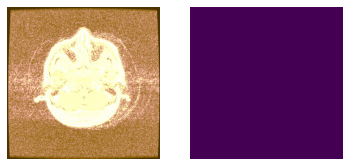

In [ ]:
idx=20
imgs = [ds[idx][0],ds[idx][1]]
fig,axs = plt.subplots(1, 2)
for i,ax in enumerate(axs.flatten()):
    ax.axis('off')
    ax.imshow(imgs[i]) #, cmap='gray'

In [ ]:
unique, counts = np.unique(array(ds[idx][1]), return_counts=True)

print( np.array((unique, counts)).T)

[[     0 262144]]


In [ ]:
unique, counts = np.unique(array(ds[idx][1]), return_counts=True)

print( np.array((unique, counts)).T)

[[     0 262144]]


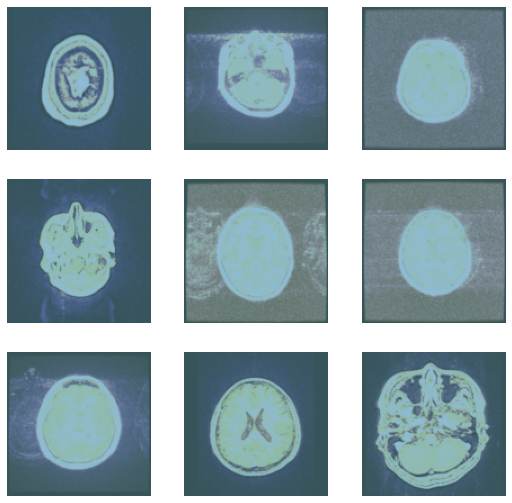

In [ ]:
dls = db.dataloaders(path/'train_images',bs = bs) #, num_workers=0
dls.show_batch()

In [ ]:
def foreground_acc(inp, targ, bkg_idx=0, axis=1):  # exclude a background from metric
    "Computes non-background accuracy for multiclass segmentation"
    targ = targ.squeeze(1)
    mask = targ != bkg_idx
    return (inp.argmax(dim=axis)[mask]==targ[mask]).float().mean() 

def cust_foreground_acc(inp, targ):  # # include a background into the metric
    return foreground_acc(inp=inp, targ=targ, bkg_idx=3, axis=1) # 3 is a dummy value to include the background which is 0

In [ ]:
learn.fine_tune(5, wd=0.1, cbs=SaveModelCallback() )
learn.show_results()
# Save the model
learn.export(path/f'Liver_segmentation')

In [ ]:
learn.show_results()
# Save the model
learn.export(path/f'Liver_segmentation')

In [ ]:
GENERATE_JPG_FILES = True   # warning: generation takes ~ 1h
im_size = 128
path = Path(".")

# Load saved model
if (GENERATE_JPG_FILES) :
    
    tfms = [Resize(im_size), IntToFloatTensor(),Normalize()]
    learn0               = load_learner(path/f'Liver_segmentation',cpu=False )
    learn0.dls.transform = tfms

In [ ]:
def nii_tfm(fn,wins): 

    test_nii  = read_nii(fn)
    curr_dim  = test_nii.shape[2] # 512, 512, curr_dim
    slices = []
    
    for curr_slice in range(curr_dim):
        data = tensor(test_nii[...,curr_slice].astype(np.float32))
        data = (data.to_nchan(wins)*255).byte()
        slices.append(TensorImage(data))
                      
    return slices 

In [ ]:
tst = 20

test_nii   = read_nii(df_files.loc[tst,'dirname']+"/"+df_files.loc[tst,'filename'])
test_mask  = read_nii(df_files.loc[tst,'mask_dirname']+"/"+df_files.loc[tst,'mask_filename'])
print(test_nii.shape)

test_slice_idx = 500

sample_slice = tensor(test_nii[...,test_slice_idx].astype(np.float32))

plot_sample([test_nii[...,test_slice_idx], test_mask[...,test_slice_idx]])

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(brain_df_train, test_size=0.15)

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.1)
train_generator = datagen.flow_from_dataframe(train,
                        directory='./',
                        x_col='image_path',
                        y_col='mask',
                        subset='training',
                        class_mode='categorical',
                        batch_size=16,
                        shuffle=True,
                        target_size=(256,256)
                        )
valid_generator = datagen.flow_from_dataframe(train,
                        directory='./',
                        x_col='image_path',
                        y_col='mask',
                        subset='validation',
                        class_mode='categorical',
                        batch_size=16,
                        shuffle=True,
                        target_size=(256,256)
                        )

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
clf_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(256,256,3)))
clf_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
for layer in clf_model.layers:
    layers.trainable = False

In [ ]:
head = clf_model.output
head = AveragePooling2D(pool_size=(4,4))(head)
head = Flatten(name='Flatten')(head)
head = Dense(256, activation='relu')(head)
head = Dropout(0.3)(head)
head = Dense(256, activation='relu')(head)
head = Dropout(0.3)(head)
head = Dense(2, activation='softmax')(head)

model = Model(clf_model.input, head)
model.compile(loss = 'categorical_crossentropy', 
              optimizer='adam', 
              metrics= ["accuracy"]
             )
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', 
                              mode='min', 
                              verbose=1, 
                              patience=15
                             )
checkpointer = ModelCheckpoint(filepath="Model-weights.hdf5", 
                               verbose=1, 
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )
callbacks = [checkpointer, earlystopping, reduce_lr]

In [ ]:
h = model.fit(train_generator, 
              steps_per_epoch= train_generator.n // train_generator.batch_size, 
              epochs = 50, 
              validation_data= valid_generator, 
              validation_steps= valid_generator.n // valid_generator.batch_size, 
              callbacks=[checkpointer, earlystopping])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn = unet_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(axis=1), metrics=[foreground_acc, cust_foreground_acc]) 

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
file_list = []
for dirname, _, filenames in os.walk('new_test_img'):
    for filename in filenames:
        file_list.append((dirname,filename)) 

df_files = pd.DataFrame(file_list, columns =['dirname', 'filename']) 
df_files

,dirname,filename
0,new_test_img,6PQM3A3D_slice_44.jpg
1,new_test_img,6PQM3A3D_slice_45.jpg
2,new_test_img,6PQM3A3D_slice_46.jpg
3,new_test_img,6PQM3A3D_slice_47.jpg
4,new_test_img,6PQM3A3D_slice_48.jpg
...,...,...
8722,new_test_img,ISHW4ML2_slice_170.jpg
8723,new_test_img,ISHW4ML2_slice_171.jpg
8724,new_test_img,ISHW4ML2_slice_172.jpg
8725,new_test_img,ISHW4ML2_slice_173.jpg


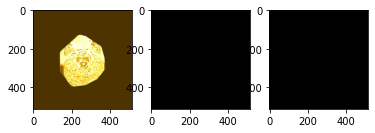

In [ ]:
img = io.imread('new_test_img/2JA4PBWY_slice_0.jpg')
img2 = io.imread('new_img_result2/2JA4PBWY_slice_0.png')
img3 = io.imread('new_img_result_ceil/2JA4PBWY_slice_0.png')
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img3, cmap='gray')